<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/6_Uczenie_maszynowe/1_Sklearn_intro%2C_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Scikit-Learn, często nazywany sklearn, to popularna biblioteka programistyczna w języku Python do uczenia maszynowego (machine learning). Jest to narzędzie o otwartym źródle, które zapewnia szeroki zestaw narzędzi i algorytmów do analizy danych, uczenia maszynowego i modelowania statystycznego.



Główne cechy i funkcje biblioteki Scikit-Learn:

1. **Bogata kolekcja algorytmów uczenia maszynowego**: Scikit-Learn zawiera wiele algorytmów uczenia maszynowego, takich jak regresja liniowa, regresja logistyczna, maszyna wektorów nośnych (SVM), drzewa decyzyjne, lasy losowe, algorytmy k-means, analiza skupień, oraz wiele innych. Obejmuje zarówno algorytmy uczenia nadzorowanego, jak i nienadzorowanego.

2. **Prostota użycia**: Biblioteka zapewnia spójny i intuicyjny interfejs do tworzenia, treningu i ewaluacji modeli uczenia maszynowego. Dzięki temu jest doskonałym narzędziem zarówno dla początkujących, jak i doświadczonych użytkowników.

3. **Wsparcie dla analizy danych**: Scikit-Learn umożliwia preprocesowanie danych, takie jak skalowanie, kodowanie kategorii, obsługa danych brakujących i wiele innych operacji, co jest kluczowe w przygotowaniu danych do modelowania.

4. **Walidacja krzyżowa**: Biblioteka dostarcza narzędzia do walidacji modelu, w tym walidację krzyżową, co pozwala na dokładną ocenę wydajności modelu i unikanie przeuczenia.

5. **Wsparcie dla uczenia maszynowego wraz z uczeniem głębokim**: Biblioteka jest często używana w połączeniu z innymi narzędziami i bibliotekami do uczenia głębokiego, co pozwala na tworzenie zaawansowanych modeli uczenia maszynowego.

6. **Wsparcie społeczności**: Scikit-Learn ma duże grono użytkowników i aktywną społeczność deweloperów, co oznacza, że istnieje wiele dostępnych źródeł, dokumentacji i pomocy online.

7. **Interoperacyjność**: Biblioteka jest często używana w połączeniu z innymi popularnymi bibliotekami Pythona, takimi jak NumPy, Pandas, Matplotlib i innych, co pozwala na kompleksową analizę danych i wizualizację wyników.



Scikit-Learn jest szeroko używane w dziedzinie uczenia maszynowego, analizy danych, eksploracji danych, nauki danych i wielu innych, gdzie modelowanie statystyczne i uczenie maszynowe są niezbędne do rozwiązywania problemów i przewidywania wyników na podstawie danych. Dzięki swojej prostocie i bogatej kolekcji algorytmów, Scikit-Learn jest jednym z narzędzi wyboru dla profesjonalistów zajmujących się uczeniem maszynowym i nauką danych.

Uczenie maszynowe dzielimy co do zasady, ze względu na rodzaj zastosowanej metody uczenia na:
- **nadzorowane** - podajemy modelowi do uczenia dane, które są zaetykietowane; rodzaje tego uczenia to klasyfikacja i regresja liniowa - w przypadku klasyfikacji podajemy wektor danych, które mają przypisaną pewną klasę (dyskretną), w przypadku regresji do wektora danych przypisana jest wartość ciągła;
- **nienadzorowane** - podajemy modelowi dane, które nie są zaetykietowane i to zadaniem modelu jest odnalezienie w danych pewnych wzorców, grup; rodzajami tego rodzaju uczenia są redukcja wymiarowości, selekcja modeli lub cech i klasteryzacja;
- **uczenie ze wzmocnieniem** - uczenie polega na stworzeniu środowiska, w którym model automatycznie zbiera dane i optymalizuje swoje działania w celu uzyskania możliwie maksymalnej nagrody.

Scikit-learn posiada jedną z najlepszych dokumentacji ze wszystkich bibliotek Pythona, oprócz uczenia maszynowego umożliwia również preprocessing danych, dobór najlepszych parametrów modeli, walidację krzyżową, tworzenie potoków modeli itp.

# Klasyfikacja - pierwszy model.

W tym segmencie wyuczymy nasz pierwszy model klasyfikacyjny i będziemy z jego pomocą dokonywać predykcji.

In [1]:
import sklearn
sklearn.__version__

'1.3.2'

Zaimportujemy również inne kluczowe biblioteki i ustawimy ziarno losowe, aby za każdym razem uzyskać ten sam wynik losowania.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

np.random.seed(42)

Kolejnym krokiem jest załadowanie danych. Ponownie będą to dane dot. kosaćca, tym razem w formie słownika.

In [3]:
raw_data = load_iris()
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Wyświetlamy nazwy kluczy słownika danych, odpowiadające kolumnom dataframe.

In [4]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Zmienna DESCR zawiera opis zbioru danych - informacje dot. zmiennych, ich liczność, podstawowe statystyki opisowe.

In [5]:
print(raw_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Właściwe dane do modelu znajdują się pod kluczem data.

In [6]:
data = raw_data.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Zmienną docelową jest zmienna target. Jest to - podobnie jak zmienna data - tablica ndarray. Zawiera ona wektor klas.

In [7]:
target = raw_data.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Sprawdzamy kształt zbioru zmiennych niezależnych i zbioru zmiennych zależnych - liczba próbek w obydwu jest taka sama.

In [8]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


Istotą uczenia maszynowego jest podział zbiorów na treningowy i testowy (niekiedy wyróżniamy też zbiór walidacyjny). Na treningowym model trenujemy, na testowym badamy jego zdolność do generalizowania (poprawnego rozpoznawania danych, na których nie był uczony).

Dzielenie zbiorów odbywa się przy użyciu funkcji **train_test_split**, któremu podajemy nasze zbiory oraz stosunek zbioru testowego do całości danych (parametr test_size).

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

Konwencja zakłada, że zbiory zmiennych niezależnych i etykiet oznaczamy przez **X** i **y**. Funkcja train_test_split dzieli każdy z tych zbiorów na kolejne dwa zbiory (treningowy i testowy), wobec czego powstają cztery zbiory w postaci tablic ndarray.

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Najwyższa pora na import klasy modelu - w tym wypadku będzie to regresja logistyczna.

In [11]:
from sklearn.linear_model import LogisticRegression

Nasz model przypisujemy do zmiennej, tworząc obiekt typu **LogisticRegression**.

In [12]:
lr_model = LogisticRegression()
type(lr_model)

sklearn.linear_model._logistic.LogisticRegression

Model, którego instancja została utworzona, trenujemy przy pomocy metody **fit**, której przekazujemy nasze zbiory danych i etykiet treningowych.

In [13]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Wytrenowany model używamy do predykcji danych testowych za pomocą metody **predict**, której przekazujemy tylko zbiór X testowy. Przypiszemy go do zmiennej y_pred.

In [14]:
y_pred = lr_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Tworząc model, chcemy wiedzieć, jak dobrze predykuje on dane testowe Aby mieć możliwość jej oceny, potrzebujemy metryk klasyfikacji. Na ten moment importujemy funkcję **confusion_matrix**, która wyświetla nam macierz konfuzji.

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Nie zagłębiając się póki co w szczegółowy opis konstrukcji macierzy konfuzji, musimy podkreślić, że podstawowym celem jest maksymalizacja wartości na przekątnej macierzy. Pod tym względem model spisał się bez zarzutu - przypisał wszystkie dane do klas bezbłędnie.

Innym sposobem na zbiorcze wyświetlenie wszystkich metryk jest funkcja **classification_report**. Jak widać poniżej, wszystkie metryki przyjmują wartość 1, a więc model okazał się dla ww. danych bezbłędny.

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Oczywiście ten przypadek był bardzo prosty - co do zasady praca przy tworzeniu modelu uczenia maszynowego wymaga poświęcenia znacznie większej ilości czasu na preprocessing, wizualizację zmiennych itp. Ważne, aby nie dopuścić do tzw. data leakage - nie dopuścić do treningu na danych testowych!

# Klasyfikacja binarna - dokładność modelu i interpretacja graficzna.

O klasyfikacji binarnej mówimy w przypadku istnienia dwóch klas do predykcji (np. ocena zdolności kredytowej lub churn modelling - przewidywanie, czy klient odejdzie, czy pozostanie). Są to wszelkie problemy "zero-jedynkowe".

## Dokładność (accuracy).

Najbardziej podstawowa metryka klasyfikacji. Określa ona odsetek predykcji dokładnych (true positive + true negative) we wszystkich przypadkach predykowanych.

W pierwszej kolejności zaimportujemy biblioteki do wizualizacji. Moduł **make_subplots** z biblioteki Plotly pozwoli nam na tworzenie kilku wizualizacji jednocześnie.

In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

$$Accuracy = \frac{correct\ predictions}{total\ predictions}$$

Stwórzmy dwa fikcyjne wektory predykcji i prawdy (ground truth).

In [18]:
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

Metrykę tę można zaimplementować samodzielnie, ale łatwiej zaimportować gotową funkcję **accuracy_score**.

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7666666666666667

Wektory prawdy i predykcji znajdą się jako wartości słownika, który następnie przekształcamy w dataframe.

In [20]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,1
8,1,0
9,1,1


Dataframe sortujemy wg wartości prawdziwych oraz dodajemy doń kolumnę z numerem próbki, żeby w dalszej kolejności lepiej przedstawić graficznie, na ile skuteczny jest model.

In [21]:
results = results.sort_values(by='y_true')
results = results.reset_index(drop=True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,1,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,0,9
9,0,0,10


Zróbmy więc prostą wizualizację naszych predykcji na podstawie posortowanego dataframe. Będzie to wykres punktowy, gdzie oś y przyjmuje wartości 0 lub 1, a oś x numery próbek. Dzięki takiej wizualizacji jesteśmy w stanie łatwo zobrazować, w których przypadkach predykcje odbiegają od prawdy, a także, z predykcją której klasy model radzi sobie lepiej.

Wykorzystujemy funkcję **make_subplots**, która pozwala łatwiej tworzyć podwykresy. Metoda **add_trace** dodaje natomiast kolejne wykresy do siatki.

In [22]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=900, height=500, title='Klasyfikator binarny')
fig.show()

## Metryki.

### Macierz pomyłek (konfuzji).

Importujemy funkcję **confusion_matrix**, którą stosujemy do utworzenia macierzy. Przekazujemy jej na początku prawdziwe etykiety, potem etykiety przewidziane. Wynikiem jest macierz kwadratowa o wymiarach równych liczbie klas.

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[ 9,  1],
       [ 6, 14]])

Macierz pomyłek można też wyświetlić w formie graficznej. Poniżej mamy stworzoną przez trenera funkcję wyświetlającą interaktywną macierz w postaci interaktywnego wykresu - za pomocą metody **create_annotated_heatmap** z modułu **plotly.figure_factory**.

In [24]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

Możemy również - co wygodniejsze - zastosować metodę **ConfusionMatrixDisplay**.

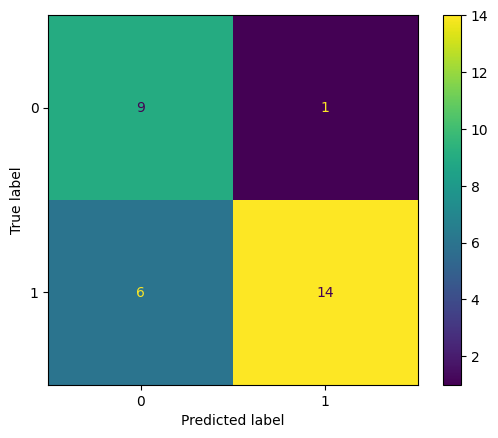

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()

Jak interpretować macierz pomyłek? Na przekątnej biegnącej z lewego górnego do prawego dolnego rogu znajdują się poprawne predykcje (True Negative i True Positive), a na drugiej - niepoprawne (False Positive - błąd pierwszego rodzaju - i False Negative - błąd drugiego rodzaju).

Którego rodzaju błąd jest dla nas bardziej kosztowny w skutkach? To zależy od modelu. Jeżeli mielibyśmy model, od którego zależy np. wykrycie choroby nowotworowej, znacznie więcej problemów przysporzą predykcje fałszywie negatywne (niewykrycie nowotworu u chorego), natomiast w przypadku np. filtra spamu w skrzynce e-mail problematyczne mogą okazać się predykcje fałszywie pozytywne (np. mail z zaproszeniem na ważne spotkanie wpadająca do foldera z wiadomościami niechcianymi).

### Inne metryki na podstawie macierzy pomyłek.

Jakie metryki możemy wyznaczyć jeszcze na podstawie macierzy pomyłek? Najpierw za pomocą funkcji **ravel** sprowadźmy naszą macierz do postaci jednowymiarowej tablicy ndarray.

In [26]:
cm.ravel()

array([ 9,  1,  6, 14])

Te elementy tablicy przypiszmy do zmiennych odpowiadających rodzajom klas i predykcji:
- True Negative (TN) - prawidłowo przewidziana klasa negatywna (0),
- False Positive (FP) - przewidziana klasa pozytywna, prawdziwa negatywna (błąd I rodzaju),
- False Negative (FN) - przewidziana klasa negatywna, prawdziwa pozytywna (błąd II rodzaju),
- True Positive - prawidłowo przewidziana klasa pozytywna (1).

In [27]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 9
FP - False Positive: 1
FN - False Negative: 6
TP - True Positive: 14


Błąd I rodzaju (False Positive Rate) informuje nas, jaki jest wskaźnik wartości fałszywie pozytywnych wśród wszystkich predykcji dot. klasy negatywnej.

In [28]:
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr}')

False Positive Rate: 0.1


Błąd II rodzaju (False Negative Rate) jest to wartość predykcji fałszywie negatywnych wśród wszystkich predykcji odnoszących się do klasy pozytywnej. W większości modeli jest on poważniejszy w skutkach niż błąd I rodzju.

In [29]:
fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr}')

False Negative Rate: 0.3


Precyzja (precision) wskazuje, jaka część predykcji pozytywnych jest rzeczywiście pozytywna.

In [30]:
precision = tp / (tp + fp)
print(f'Precision: {precision}')

Precision: 0.9333333333333333


Czułość (recall) pokazuje nam, jak wiele obserwacji spośród wszystkich pozytywnych została prawidłowo sklasyfikowana jako pozytywne.

In [31]:
recall = tp / (tp + fn)
print(f'Recall: {recall}')

Recall: 0.7


Metryka F1 to średnia harmoniczna precyzji i czułości, określa stosunek iloczynu tych metryk pomnożonego przez 2 do sumy tych metryk.

In [32]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score}')

F1 Score: 0.8


### Krzywa ROC.

Tworzenie tej krzywej umożliwia funkcja **roc_curve**.

In [33]:
from sklearn.metrics import roc_curve

Funkcja zwraca nam kolejno FPR, TPR i wartości progowe alfa. Wartości progowe zwracane są w postaci tablicy zawierającej różne wartości progów, przy których obliczane są wartości FPR i TPR. Są to punkty, dla których rozważamy, jak model dzieli wyniki na klasy. Na przykład, jeśli model daje wyniki prawdopodobieństw, możemy zmieniać próg (np. od 0.1 do 0.9) i obserwować, jak to wpływa na FPR i TPR.

Funkcja roc_curve analizuje wyniki modelu, porównując różne progi decyzyjne (z tablicy thresholds) i oblicza dla każdego z nich wartości FPR i TPR. Te punkty są następnie używane do narysowania krzywej ROC.

In [34]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.1,0.7
2,1.0,1.0


Do stworzenia wykresu użyjemy funkcji znajdującej się w materiałach dostarczonych w ramach kursu. Korzysta ona ponownie z obiektów z biblioteki Plotly, umożliwiając nam stworzenie w pełni interaktywnego wykresu.

In [35]:
def plot_roc_curve(y_true, y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(data=[go.Scatter(x=roc['fpr'], y=roc['tpr'], line_color='red', name='ROC Curve'),
                        go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line_dash='dash', line_color='navy')],
                    layout=go.Layout(xaxis_title='False Positive Rate',
                                    yaxis_title='True Positive Rate',
                                    title='ROC Curve',
                                    showlegend=False,
                                    width=800,
                                    height=400))
    fig.show()
plot_roc_curve(y_true, y_pred)

Na osi X znajduje się odsetek FPR. Wartość ta wynosi od 0 do 1. Im bliżej 0, tym lepiej, bo oznacza to, że model popełnia mało błędów w wykrywaniu negatywnych przypadków.

Na osi mamy odsetek trafień - TPR. Również wynosi od 0 do 1. Im bliżej 1, tym lepiej, bo oznacza to, że model wykrywa więcej pozytywnych przypadków.

Idealny model: W idealnym przypadku krzywa ROC powinna iść w górę od punktu (0,0) do punktu (0,1), a potem poziomo do punktu (1,1). Taki kształt oznacza, że model ma bardzo niski FPR i wysoki TPR, czyli doskonale klasyfikuje przypadki.

Model losowy: Krzywa, która biegnie blisko przekątnej (od (0,0) do (1,1)), oznacza model, który działa losowo i nie rozróżnia dobrze między klasami.

Pole pod krzywą (AUC): Wartość AUC (Area Under the Curve) mówi nam, jak dobra jest krzywa ROC. AUC wynoszące 1 oznacza doskonały model, AUC wynoszące 0,5 oznacza model losowy, a wartości między 0,5 a 1 wskazują na różną jakość modelu (im bliżej 1, tym lepiej).

# Klasyfikacja wieloklasowa - metody oceny.

Dokładność:

$$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

Tworzymy dwie nowe fikcyjne próbki klas - tym razem będą to trzy klasy: 0, 1 i 2. Wykorzystujemy funkcję **accuracy_score**.

In [36]:
y_true = np.array([1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0])
y_pred = np.array([1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0])

accuracy_score(y_true, y_pred)

0.8333333333333334

Macierz konfuzji - tym razem będzie oczywiście miała wymiar 3 x 3.

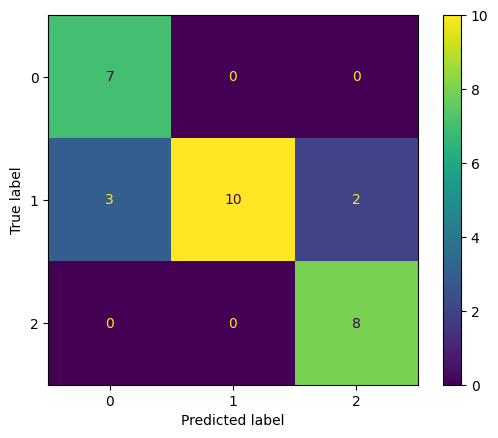

In [37]:
cm = confusion_matrix(y_true, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2]).plot()

Raport klasyfikacji - tworzymy go funkcją **classification_report**. Wskazujemy mu kolejno dane prawdziwe i dane przewidziane przez model, możemy też wskazać argumenty dodatkowe, jak np. nazwy klas. Metryki wskazywane przez raport to precyzja, czułość, wskaźnik F1 i dokładność. Raport wyszczególnia też liczbę próbek - zarówno na klasę, jak i ogółem.

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.70      1.00      0.82         7
     label_2       1.00      0.67      0.80        15
     label_3       0.80      1.00      0.89         8

    accuracy                           0.83        30
   macro avg       0.83      0.89      0.84        30
weighted avg       0.88      0.83      0.83        30

